In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv('deliveries.csv')
df2=pd.read_csv('matches.csv')

In [4]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
df1.drop(['player_dismissed', 'dismissal_kind', 'fielder'], axis=1, inplace=True)

In [9]:
df2.drop(['umpire3'], axis=1, inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_runs     179078 non-null  int64 
dtypes: i

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

<AxesSubplot:>

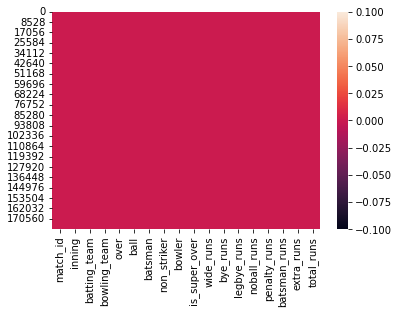

In [12]:
sns.heatmap(df1.isnull())

<BarContainer object of 200 artists>

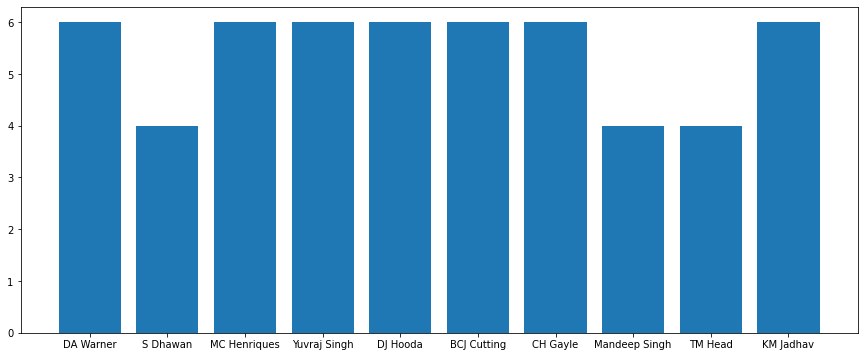

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,6)
plt.bar('batsman', 'batsman_runs', data=df1[:200])

<AxesSubplot:xlabel='winner', ylabel='count'>

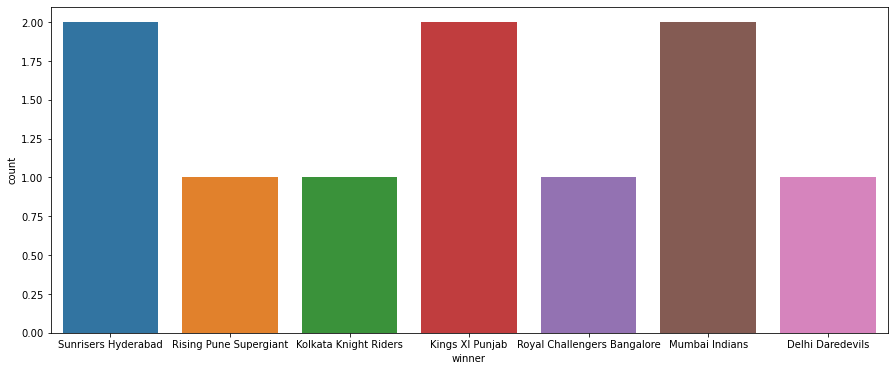

In [14]:
sns.countplot(x='winner', data=df2[:10])

In [15]:
new=df2.groupby(['winner',]).size().reset_index().rename(columns={0:'count'})

In [16]:
new

,winner,count
0,Chennai Super Kings,100
1,Deccan Chargers,29
2,Delhi Capitals,10
3,Delhi Daredevils,67
4,Gujarat Lions,13
5,Kings XI Punjab,82
6,Kochi Tuskers Kerala,6
7,Kolkata Knight Riders,92
8,Mumbai Indians,109
9,Pune Warriors,12


([<matplotlib.patches.Wedge at 0x2abe87b1460>,
 [Text(1.0053978140098265, 0.4462905282260229, 'Chennai Super Kings'),
  Text(0.6338585746784063, 0.8990124066477945, 'Deccan Chargers'),
  Text(0.4796366616810757, 0.9899235691564442, 'Delhi Capitals'),
  Text(0.14205999405166983, 1.0907882278838728, 'Delhi Daredevils'),
  Text(-0.22360595645202685, 1.0770331360915384, 'Gujarat Lions'),
  Text(-0.6225417811815351, 0.9068857318776835, 'Kings XI Punjab'),
  Text(-0.9068857045558537, 0.6225418209825209, 'Kochi Tuskers Kerala'),
  Text(-1.0797509084326269, 0.2100903989689132, 'Kolkata Knight Riders'),
  Text(-0.8773300023404649, -0.6635450753289336, 'Mumbai Indians'),
  Text(-0.44629051645950607, -1.005397819232918, 'Pune Warriors'),
  Text(-0.059711002612122664, -1.0983781662829315, 'Rajasthan Royals'),
  Text(0.32590317507641536, -1.0506127357285897, 'Rising Pune Supergiant'),
  Text(0.39105679733520804, -1.0281413235824783, 'Rising Pune Supergiants'),
  Text(0.7378632366719865, -0.81581728

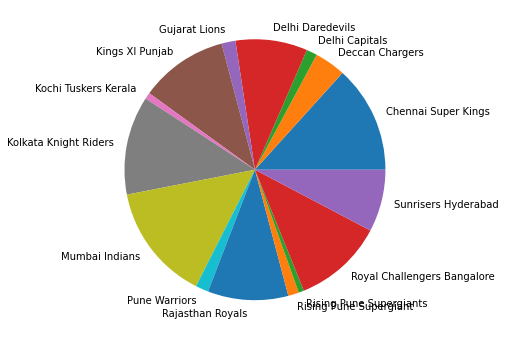

In [17]:
plt.pie('count', labels='winner', data=new)

In [23]:
new1=df2.groupby(['player_of_match',]).size().reset_index().rename(columns={0:'count'})

In [24]:
new1

,player_of_match,count
0,A Chandila,1
1,A Joseph,1
2,A Kumble,3
3,A Mishra,11
4,A Nehra,6
...,...,...
221,Washington Sundar,1
222,YK Pathan,16
223,YS Chahal,1
224,Yuvraj Singh,5


([<matplotlib.patches.Wedge at 0x2abeb37c5b0>,
 [Text(1.0888035854028022, 0.15654632673430227, 'A Chandila'),
  Text(1.0005951890558762, 0.4569565270769591, 'A Joseph'),
  Text(0.5947048716338131, 0.9253789038307552, 'A Kumble'),
  Text(-1.0888035927312636, 0.15654627576372757, 'A Mishra'),
  Text(0.7203468639465169, -0.8313244827396932, 'A Nehra')],
 [Text(0.5938928647651648, 0.08538890549143759, '5%'),
  Text(0.5457791940304778, 0.2492490147692504, '5%'),
  Text(0.32438447543662535, 0.50475212936223, '14%'),
  Text(-0.5938928687625074, 0.08538887768930593, '50%'),
  Text(0.3929164712435546, -0.4534497178580144, '27%')])

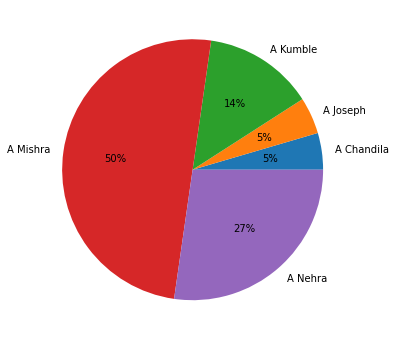

In [43]:
plt.pie("count",labels= 'player_of_match', data=new1[:5], autopct='%0.0f%%')